In [120]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [147]:
ds = pd.read_csv('Food_Delivery_Time_Prediction.csv')
ds.head() 

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [148]:
ds.shape

(200, 15)

In [149]:
ds = ds.dropna()
ds.shape

#After dropind emplty values the shape remains same this mean there is no empty value

(200, 15)

In [150]:
#Checkin correlation of values to get the best feature
ds.corr(numeric_only=True)['Delivery_Time']

Distance                     -0.075143
Delivery_Person_Experience   -0.019098
Restaurant_Rating            -0.091855
Customer_Rating              -0.021952
Delivery_Time                 1.000000
Order_Cost                   -0.009307
Tip_Amount                   -0.029154
Name: Delivery_Time, dtype: float64

In [153]:
#lets first encode the data
from sklearn.preprocessing import LabelEncoder
le_T = LabelEncoder()
ds['Traffic_Conditions'] = le.fit_transform(ds['Traffic_Conditions'])
le_W = LabelEncoder()
ds['Weather_Conditions']=le_W.fit_transform(ds['Weather_Conditions'])
le_V=LabelEncoder()
ds['Vehicle_Type'] = le_V.fit_transform(ds["Vehicle_Type"])
le_O=LabelEncoder()
ds['Order_Priority'] = le_O.fit_transform(ds["Order_Priority"])
ds.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,Afternoon,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,Night,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,Night,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,Evening,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,Night,1,3.5,2.8,32.38,619.81,2.34


In [154]:
#Correlation to take the best feature variable
ds.corr(numeric_only=True)['Delivery_Time']

Distance                     -0.075143
Weather_Conditions           -0.021580
Traffic_Conditions            0.040023
Delivery_Person_Experience   -0.019098
Order_Priority               -0.013405
Vehicle_Type                 -0.055576
Restaurant_Rating            -0.091855
Customer_Rating              -0.021952
Delivery_Time                 1.000000
Order_Cost                   -0.009307
Tip_Amount                   -0.029154
Name: Delivery_Time, dtype: float64

In [155]:
ds['Order_Time'].value_counts()
#By this value count we can see that Afternoon, and Evening are rush hours

Order_Time
Afternoon    59
Evening      57
Night        45
Morning      39
Name: count, dtype: int64

In [156]:
#Making rush hours and not rushhour columns
ds['RushHour'] = np.where(ds['Order_Time'].isin(['Afternoon', 'Evening']), 1, 0)
ds['Not Rush_Hour'] = np.where(ds['Order_Time'].isin(['Morning', 'Night']), 1, 0)

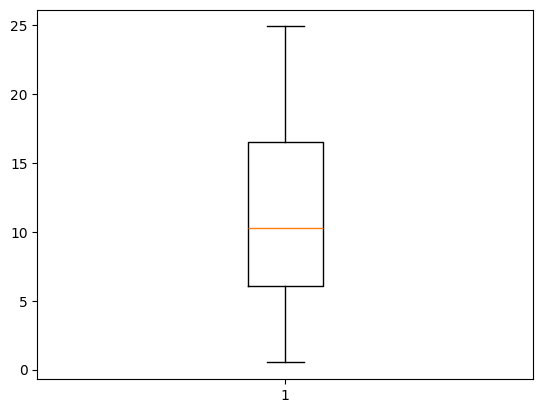

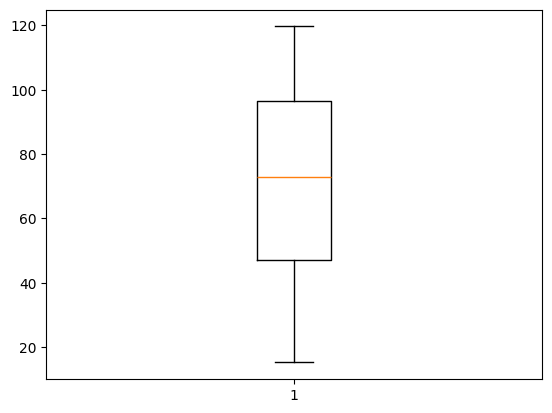

Regression Report: 
MSE:  685.5082033484459 
r2:  0.00448963136163516 
mae:  20.736340375498187


In [ ]:
#Now Normalizig the data and creating Linear Regression Model
from sklearn.preprocessing import StandardScaler
#selecting Feature best for prediction
X = ds[['Distance', 'Order_Priority', 'Traffic_Conditions']].values

#cheking for outliners
plt.boxplot(ds['Distance'])
plt.show()
plt.boxplot(ds['Delivery_Time'])
plt.show()

Y=np.array(ds['Delivery_Time'])

ss = StandardScaler()
X_Scaled = ss.fit_transform(X)

#splitting data
x_train,x_test, y_train,y_test = train_test_split(X_Scaled,Y,test_size=0.2)


#Model Creation
Lr = LinearRegression()
Lr.fit(x_train,y_train)

#prediction
y_predict = Lr.predict(x_test)

#Calculating matric
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

print("Regression Report: \nMSE: ",mse,"\nr2: ",r2,"\nmae: ",mae)



In [230]:
#making new column for delivery status
threshold = ds['Delivery_Time'].mean()


# Create binary target column
ds['Delivery_Status'] = ds['Delivery_Time'].apply(lambda x: 'Delayed' if x > threshold else 'Fast')

# Check it
print(ds['Delivery_Status'].value_counts())

Delivery_Status
Delayed    104
Fast        96
Name: count, dtype: int64


In [240]:
#Logistic regression for delivery status
x=ds[['Traffic_Conditions','Weather_Conditions','Vehicle_Type','Delivery_Person_Experience']]
le=LabelEncoder()
y = ds['Delivery_Status']

x_scaled=ss.fit_transform(x)
#Data splitting
x_train,x_test, y_train,Y_test = train_test_split(X_Scaled,y,test_size=0.2)

#Model Making
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

y_pred2 = lr.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))




Accuracy: 0.55
              precision    recall  f1-score   support

     Delayed       0.52      0.79      0.62        19
        Fast       0.64      0.33      0.44        21

    accuracy                           0.55        40
   macro avg       0.58      0.56      0.53        40
weighted avg       0.58      0.55      0.53        40



In [241]:
#Makig a confusion matrix of Logistic regression

from sklearn.metrics import confusion_matrix

#for linear regression
cm = confusion_matrix(Y_test,y_pred2)
print(cm)



[[15  4]
 [14  7]]
